In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [62]:
import warnings
import sys 
if not sys.warnoptions:
    warnings . simplefilter( "ignore" )

In [63]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [64]:
# Load the dataset
california = fetch_california_housing()

# Convert to a pandas DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

In [65]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
# Add target variable
df["MedHouseValue"] = california.target


In [67]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


### Since California Housing dataset has no missing values, we skip imputation.
### f there were missing values, we could use mean/median imputation like this:
### df.fillna(df.median(), inplace=True)

In [68]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Ensures all features are on the same scale.
### Prevents large-valued features (e.g., AveRooms) from dominating smaller-valued ones (MedInc).

In [69]:
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


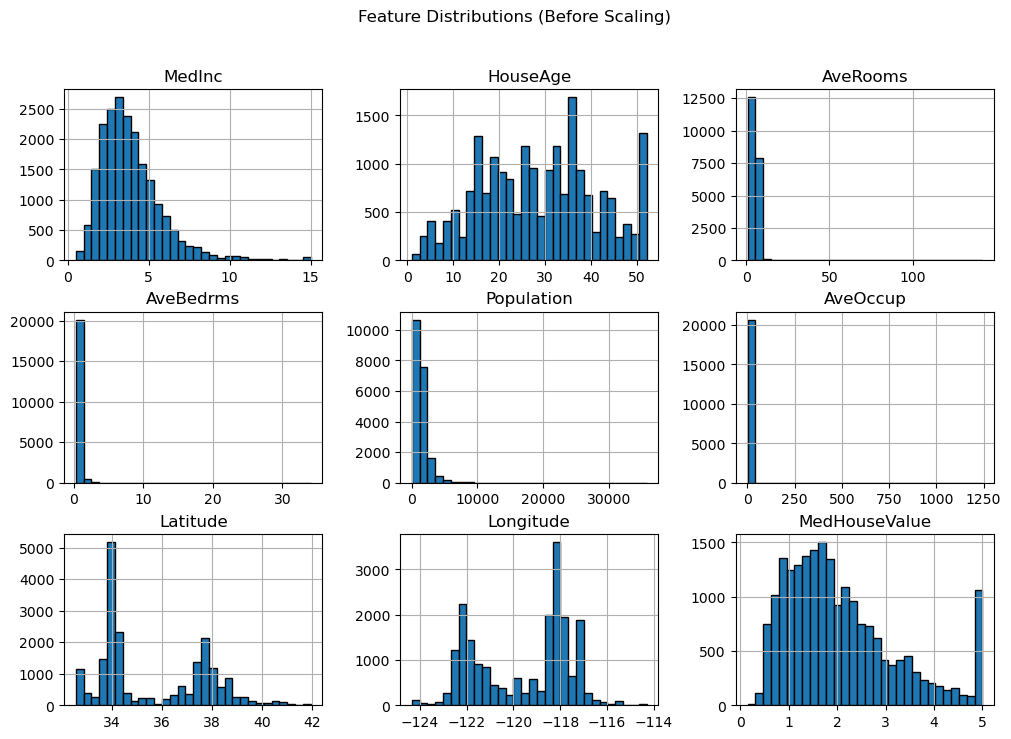

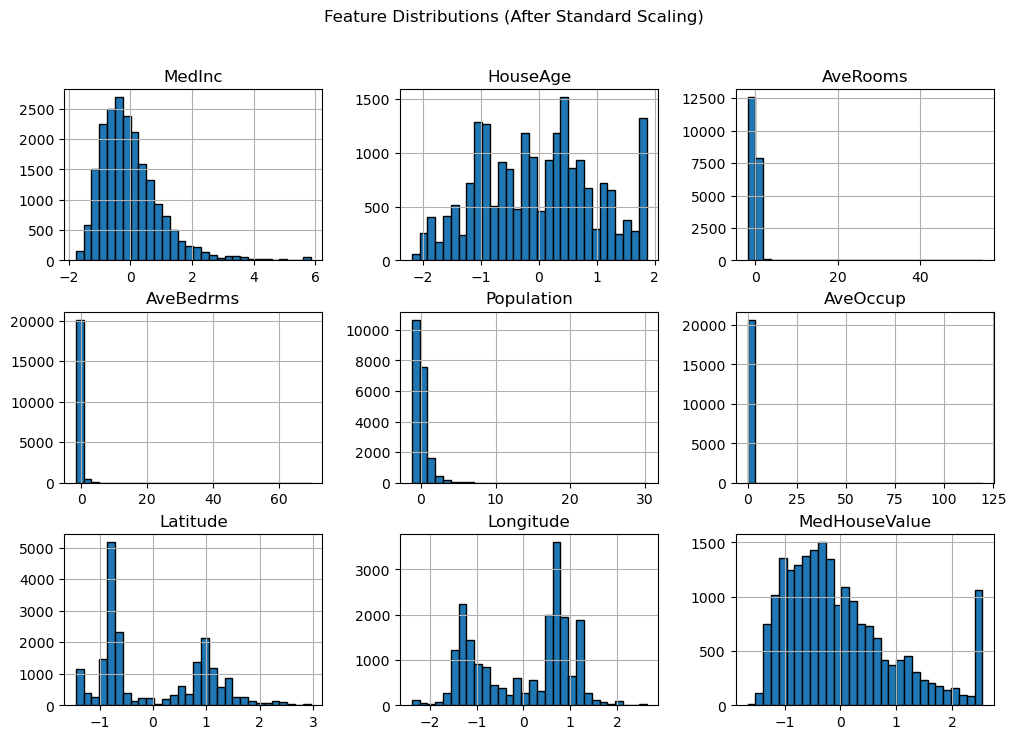

In [70]:

# Plot histograms for original features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions (Before Scaling)")
plt.show()

# Plot histograms for scaled features
df_scaled.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions (After Standard Scaling)")
plt.show()

In [71]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=["MedHouseValue"])  # Independent variables
y = df["MedHouseValue"]  # Dependent variable (house value)

In [72]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 80% Training, 20% Testing ensures the model generalizes well.
### Random state ensures reproducibility.

# linear regression

In [73]:
model = LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)


In [76]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)

In [77]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")

RMSE: 0.746
R² Score: 0.576
MAE: 0.533


Linear Regression is a supervised learning algorithm used for predicting continuous values. It assumes a linear relationship between the independent variables (X) and the dependent variable (Y).

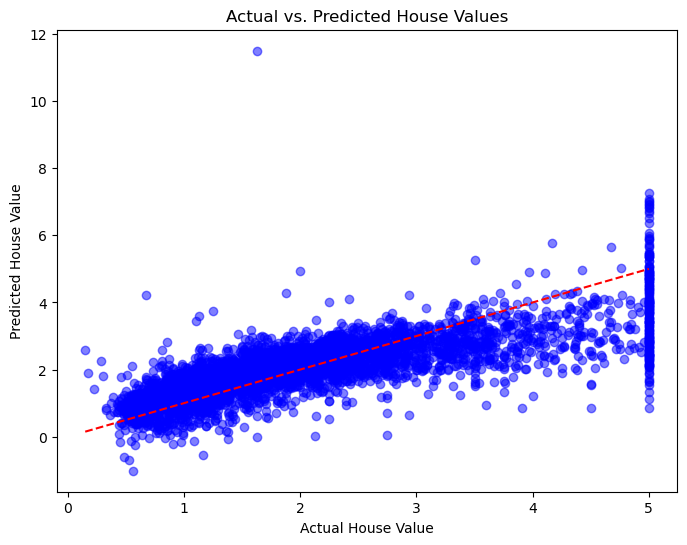

In [78]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs. Predicted House Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")  # Perfect prediction line
plt.show()


# decision tree regression

In [79]:
# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [80]:
y_pred = tree_model.predict(X_test)


In [81]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)


In [82]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")

RMSE: 0.724
R² Score: 0.600
MAE: 0.522


A Decision Tree Regressor is a non-linear model that predicts a continuous target value by splitting the dataset into smaller groups based on feature values. It works similarly to a flowchart with decision rules.

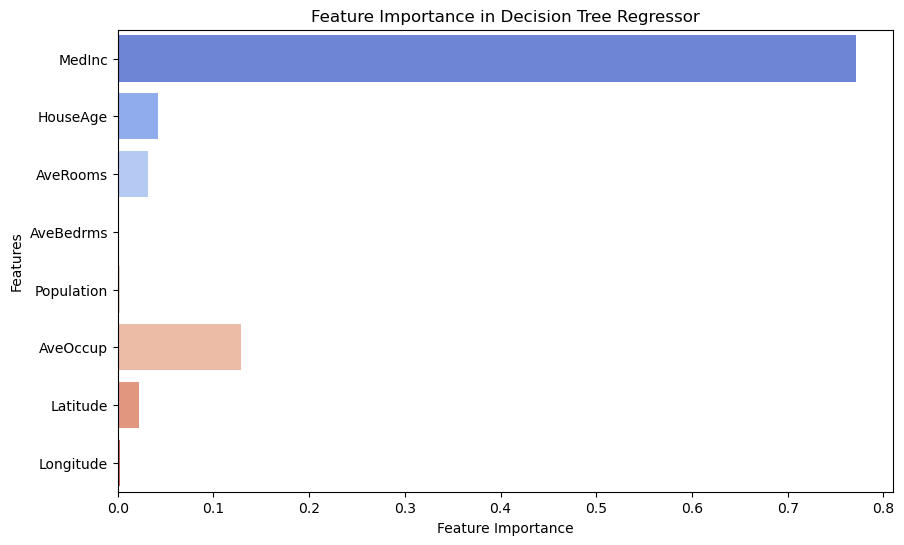

In [83]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=tree_model.feature_importances_, y=X.columns, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

# random forest regression

In [84]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [85]:
y_pred = rf_model.predict(X_test)


In [86]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)

In [87]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")

RMSE: 0.545
R² Score: 0.774
MAE: 0.366


A Random Forest Regressor is an ensemble learning method that improves prediction accuracy by combining multiple Decision Trees. Instead of relying on a single tree, it builds many trees and averages their outputs to make a final prediction.

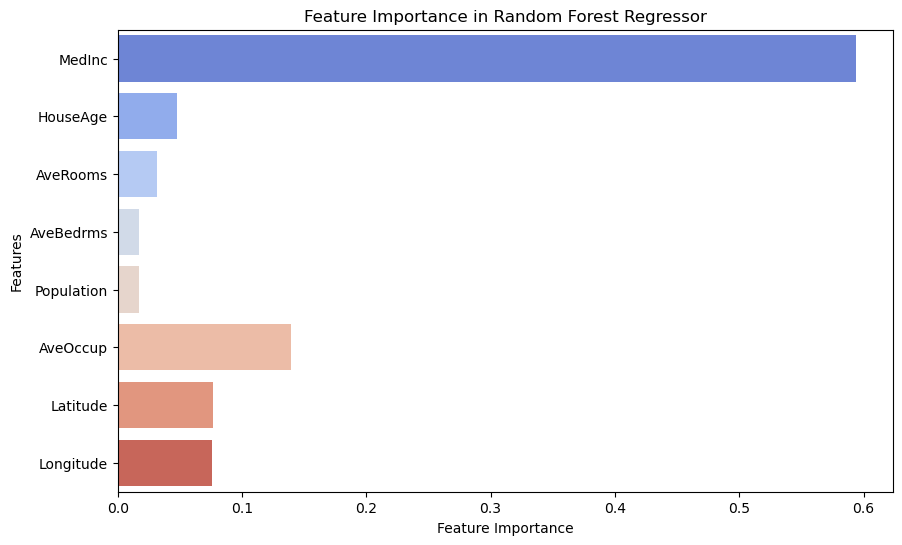

In [88]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()

# gradient boosting regression

In [89]:
# Initialize and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [90]:
y_pred = gbr_model.predict(X_test)


In [91]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)


In [92]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")

RMSE: 0.474
R² Score: 0.829
MAE: 0.314


A Gradient Boosting Regressor (GBR) is an ensemble learning technique that builds multiple weak decision trees sequentially, each correcting the errors of the previous one. It’s a powerful model for handling complex, non-linear relationships in data.



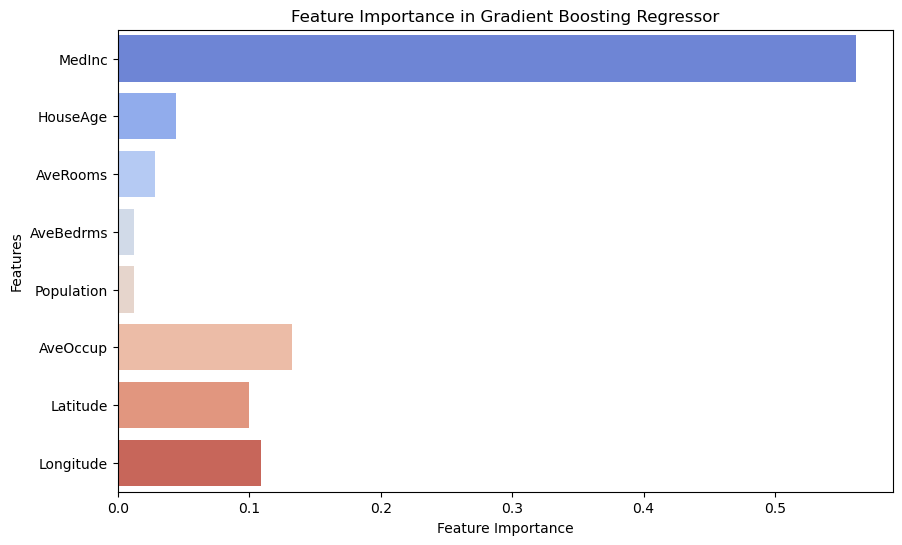

In [93]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=gbr_model.feature_importances_, y=X.columns, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.show()

# support vector regression

In [99]:
# Feature Scaling (Important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Initialize and train the Support Vector Regressor (SVR)
svr_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)



SVR(C=100, gamma=0.1)

In [101]:
y_pred = svr_model.predict(X_test_scaled)


In [102]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)

In [103]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")

RMSE: 0.570
R² Score: 0.752
MAE: 0.374


A Support Vector Regressor (SVR) is an extension of Support Vector Machines (SVM) for regression tasks. Instead of finding a decision boundary like in classification, SVR finds the best-fit hyperplane that keeps most data points within a margin of error (ϵ).



## based on r_square gradient boosting reggression is the best performing model

## based on rmse linear regression is the worst performing model